In [15]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SWAROOP\Desktop\power bi amazom sales\Amazon Store Sales.csv")

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [21]:
print(df.describe())

       Row ID+O6G3A1:R6        Sales     Quantity       Profit      Returns
count       5901.000000  5901.000000  5901.000000  5901.000000  5901.000000
mean        5022.422471   265.345589     3.781901    29.700408     0.048636
std         2877.977184   474.260645     2.212917   259.589138     0.215124
min            1.000000     0.836000     1.000000 -6599.978000     0.000000
25%         2486.000000    71.976000     2.000000     1.795500     0.000000
50%         5091.000000   128.648000     3.000000     8.502500     0.000000
75%         7456.000000   265.170000     5.000000    28.615000     0.000000
max         9994.000000  9099.930000    14.000000  8399.976000     1.000000


In [23]:
print(df.columns)

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')


In [25]:
print(df.isnull().sum())

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64


In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [29]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

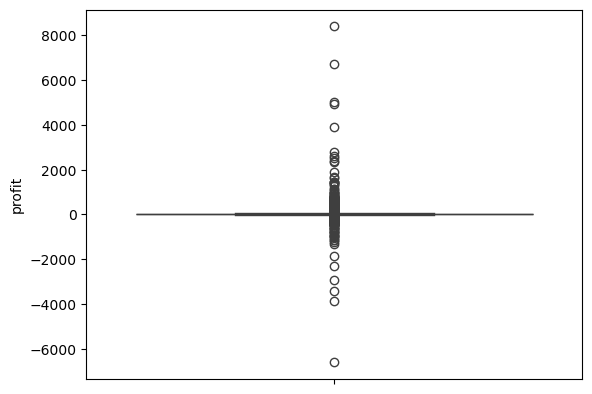

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['profit'])
plt.show()


In [43]:
# Categorical
print(df['category'].value_counts())
print(df['segment'].value_counts())
print(df['region'].value_counts())
print(df['payment_mode'].value_counts())
print(df['ship_mode'].value_counts())

category
Office Supplies    3569
Furniture          1249
Technology         1083
Name: count, dtype: int64
segment
Consumer       2997
Corporate      1774
Home Office    1130
Name: count, dtype: int64
region
West       1901
East       1688
Central    1381
South       931
Name: count, dtype: int64
payment_mode
COD       2453
Online    2164
Cards     1284
Name: count, dtype: int64
ship_mode
Standard Class    3451
Second Class      1147
First Class        959
Same Day           344
Name: count, dtype: int64


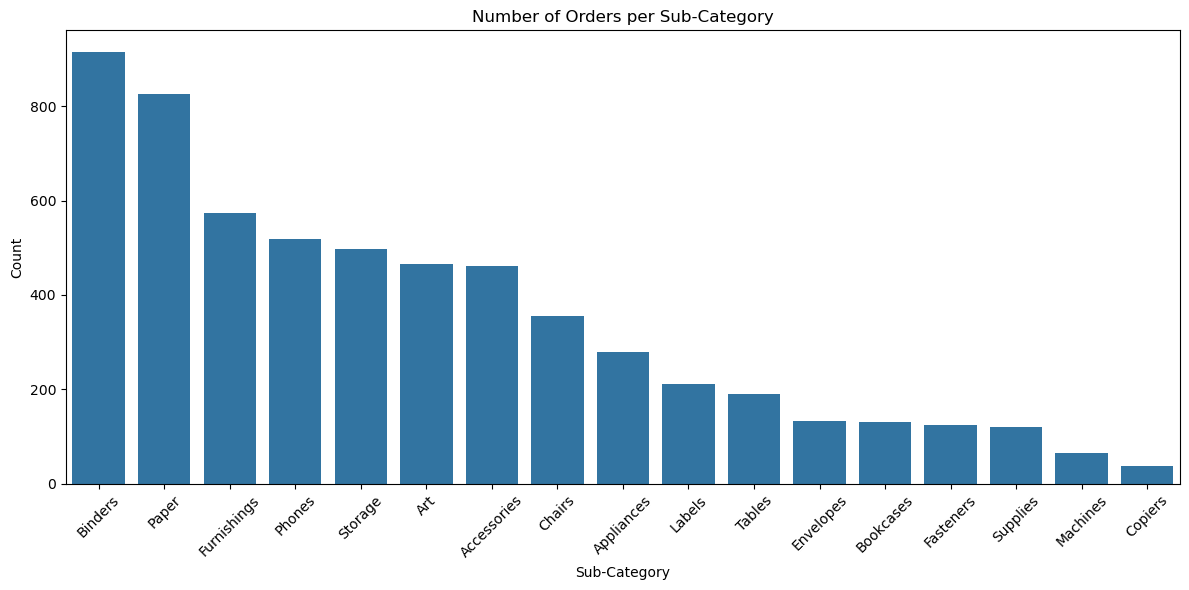

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='sub-category', order=df['sub-category'].value_counts().index)
plt.title('Number of Orders per Sub-Category')
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


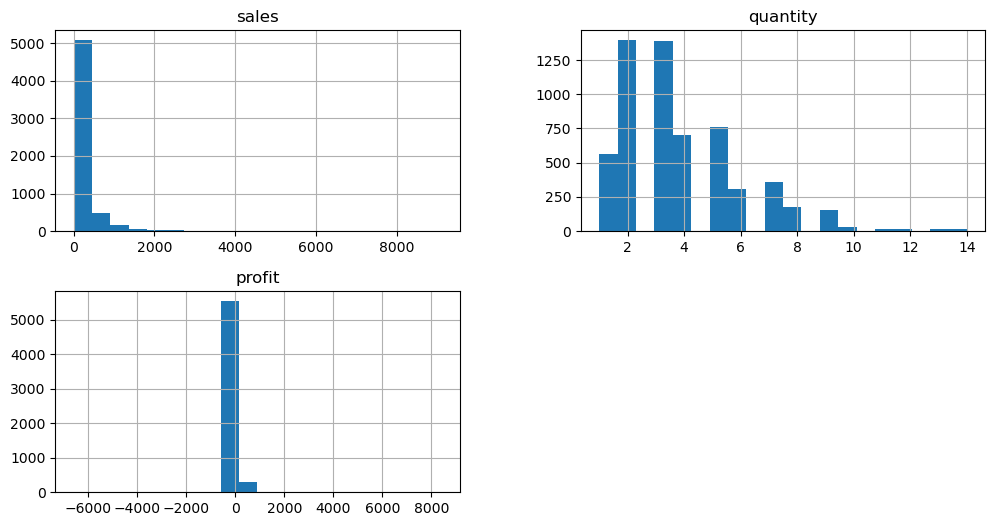

In [45]:
# Numerical
df[['sales', 'quantity', 'profit']].hist(bins=20, figsize=(12,6))
plt.show()

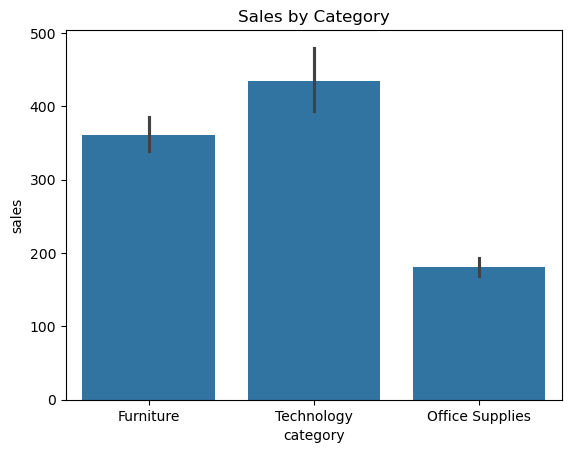

In [55]:
# Sales by Category
sns.barplot(data=df, x='category', y='sales')
plt.title('Sales by Category')
plt.show()


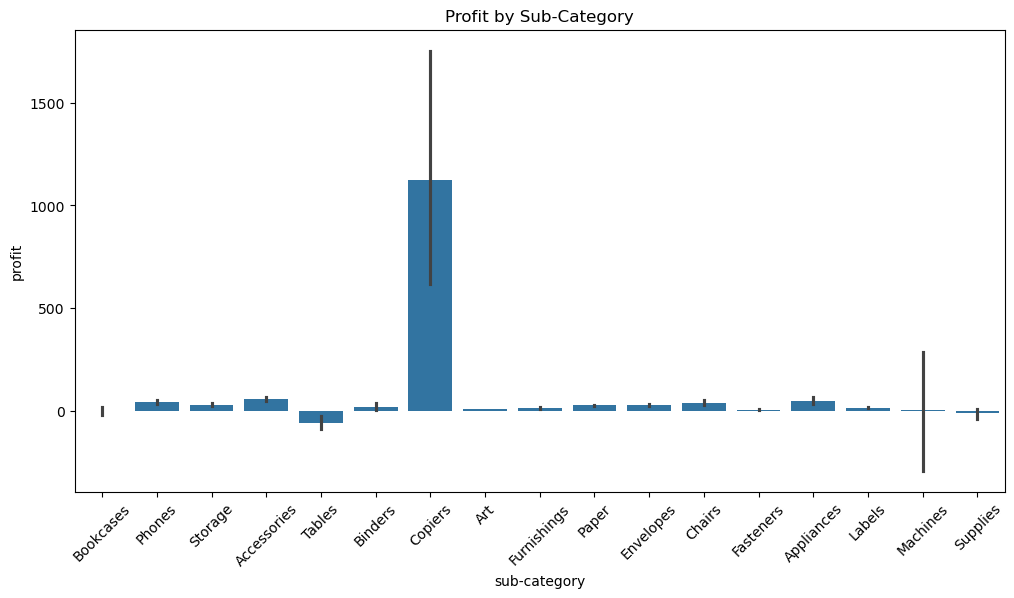

In [53]:
# Profit by Sub-Category
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='sub-category', y='profit')
plt.title('Profit by Sub-Category')
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trend Over Time

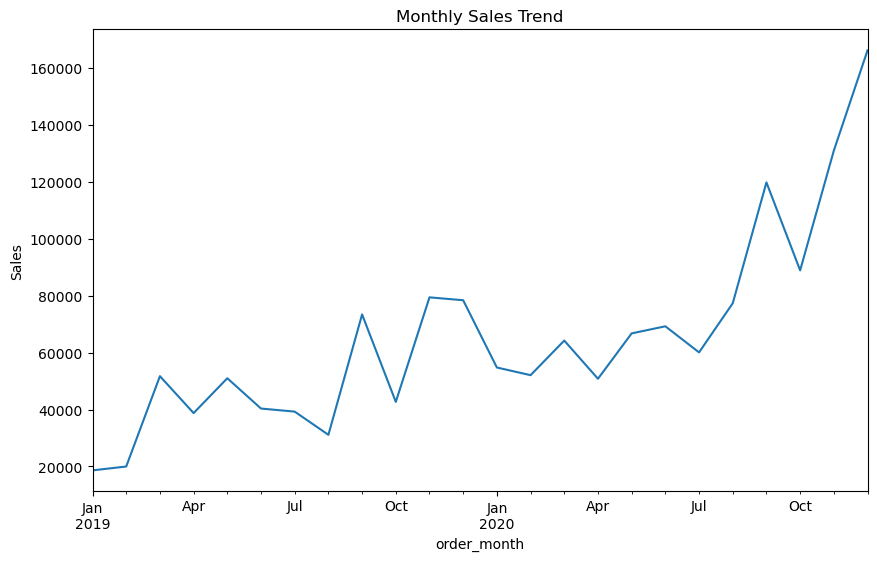

In [57]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,6), title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


In [59]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()


In [61]:
df['order_processing_time'] = (df['ship_date'] - df['order_date']).dt.days
df['profit_margin'] = df['profit'] / df['sales']


# 6-Month Sales Forecast Using Time Series Modeling

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_38996\1176643493.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_ts = df.set_index('order_date').resample('M')['sales'].sum()
C:\Users\SWAROOP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': '6-Month Sales Forecast'}>

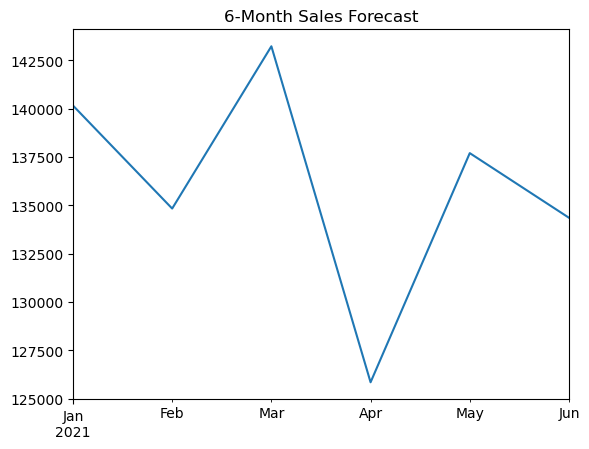

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing

monthly_sales_ts = df.set_index('order_date').resample('M')['sales'].sum()
model = ExponentialSmoothing(monthly_sales_ts, seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(6)
forecast.plot(title='6-Month Sales Forecast')


C:\Users\SWAROOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Centers (Sales, Profit):
Cluster 0: Sales = 975.71, Profit = 67.07
Cluster 1: Sales = 4180.04, Profit = -2893.13
Cluster 2: Sales = 6667.23, Profit = 2064.16
Cluster 3: Sales = 3179.49, Profit = 310.80


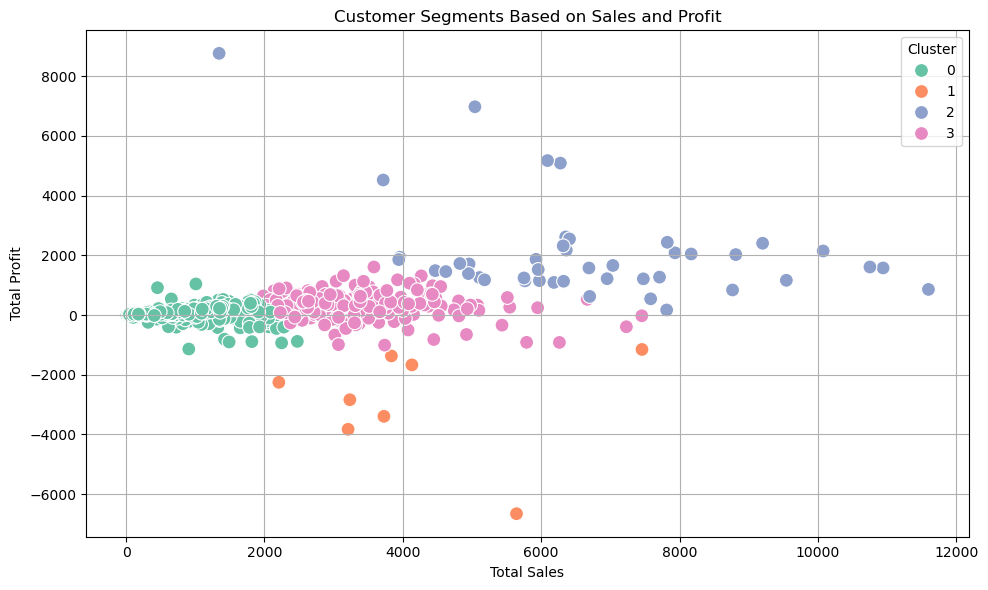

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Group sales and profit by customer
customer_metrics = df.groupby('customer_id')[['sales', 'profit']].sum().reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(customer_metrics[['sales', 'profit']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_metrics['cluster'] = kmeans.fit_predict(scaled_metrics)

# Print cluster centers (after inverse scaling for interpretation)
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

print("Cluster Centers (Sales, Profit):")
for i, center in enumerate(centers_original):
    print(f"Cluster {i}: Sales = {center[0]:.2f}, Profit = {center[1]:.2f}")

# Optional: 2D scatter plot to visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_metrics, x='sales', y='profit', hue='cluster', palette='Set2', s=100)
plt.title('Customer Segments Based on Sales and Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()



In [71]:
# Total profit by category
print(df.groupby('category')['profit'].sum().sort_values(ascending=False))

# Total profit by category and region
print(df.groupby(['category', 'region'])['profit'].sum().sort_values(ascending=False))


category
Technology         90458.2486
Office Supplies    74797.2461
Furniture          10006.6112
Name: profit, dtype: float64
category         region 
Office Supplies  West       33966.0301
Technology       West       28536.0531
                 East       26530.3100
Office Supplies  East       23248.6104
Technology       Central    22507.1654
                 South      12884.7201
Office Supplies  South      11104.9759
                 Central     6477.6297
Furniture        West        5357.8750
                 East        3621.5039
                 South       2562.0203
                 Central    -1534.7880
Name: profit, dtype: float64


C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_38996\1225758731.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='profit', estimator=sum, ci=None)


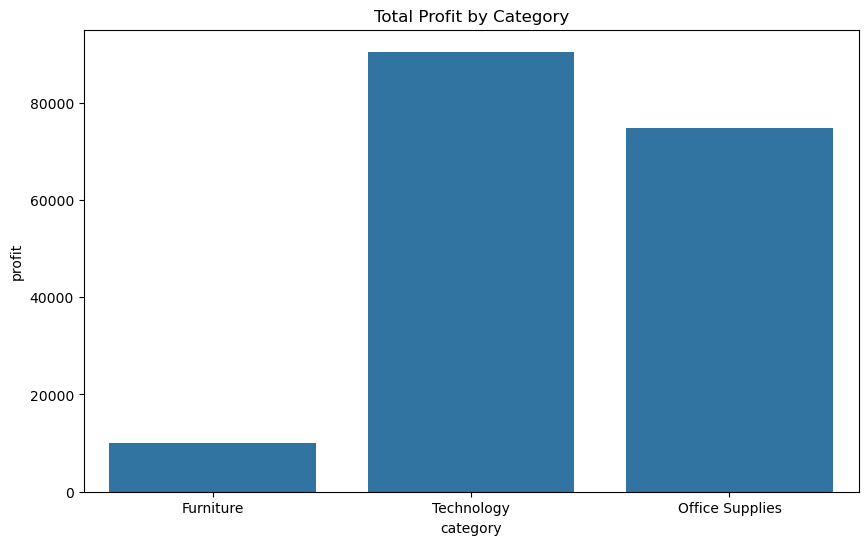

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='profit', estimator=sum, ci=None)
plt.title('Total Profit by Category')
plt.show()


 # Profit by Category in Each Region

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_38996\3507961404.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='profit', hue='category', estimator=sum, ci=None)


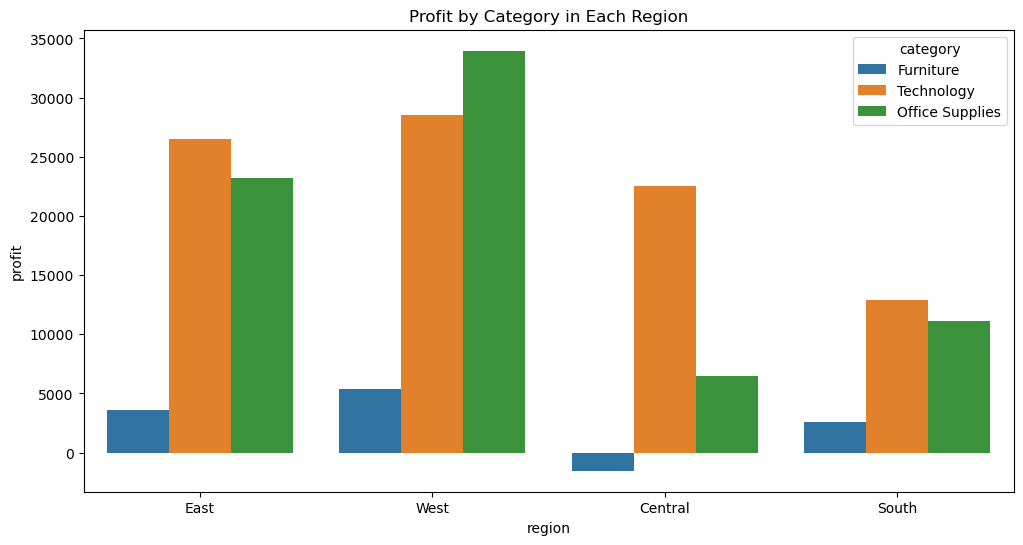

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='region', y='profit', hue='category', estimator=sum, ci=None)
plt.title('Profit by Category in Each Region')
plt.show()

In [75]:
df['order_month'] = df['order_date'].dt.month
monthly_sales = df.groupby('order_month')['sales'].sum()

# Sort by month
print(monthly_sales.sort_values(ascending=False))


order_month
12    244584.8918
11    210372.7908
9     193213.6769
10    131584.6682
5     117737.8382
3     115945.2278
6     109587.2597
8     108454.2623
7      99339.3790
4      89557.5751
1      73379.8050
2      72046.9484
Name: sales, dtype: float64


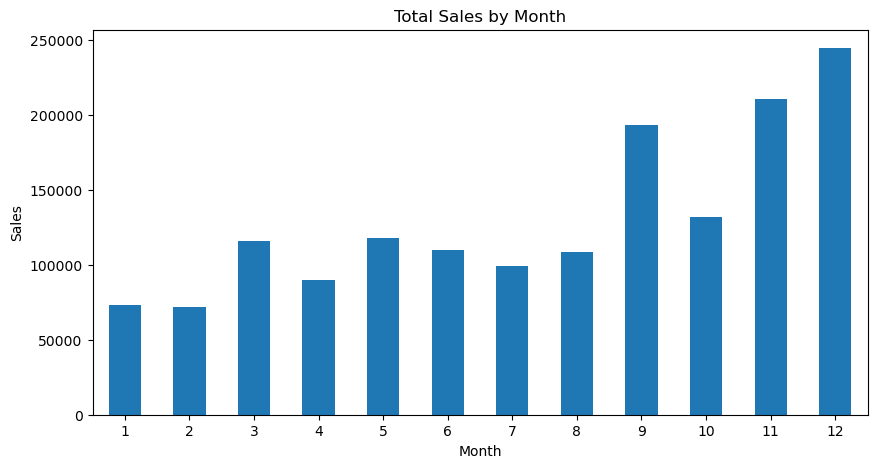

In [77]:
monthly_sales.plot(kind='bar', figsize=(10,5), title='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()


In [81]:
print(df['ship_mode'].value_counts())

ship_mode
Standard Class    3451
Second Class      1147
First Class        959
Same Day           344
Name: count, dtype: int64
